<a href="https://colab.research.google.com/github/nithinbadicodes/AI-ML-Projects/blob/master/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('winequality.csv')
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
319,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.40,6
1325,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.60,6
601,13.2,0.46,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.00,6
1393,8.0,0.52,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.20,5
1492,6.2,0.65,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,5


## Exploratory Data Analysis

In [3]:
wine.shape

(1599, 12)

In [4]:
wine.isnull().sum().sum()

np.int64(0)

In [5]:
wine.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [6]:
# Making binary classification
bins = (2,6.5,8)
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=['bad','good'])

In [7]:
wine['quality'].value_counts()

,count
quality,
bad,1382
good,217


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine['quality'].value_counts()

,count
quality,
0,1382
1,217


* `0 -> bad`
* `1 -> good`

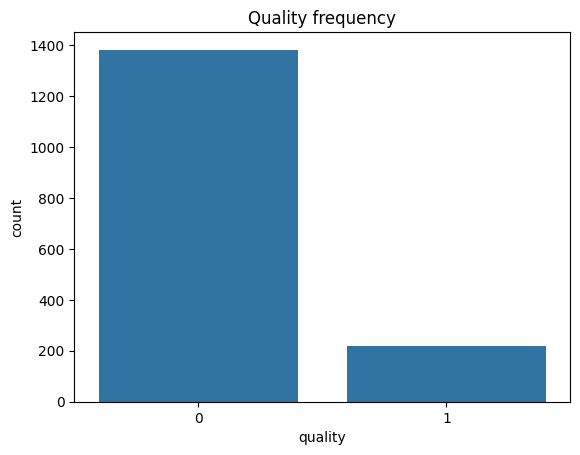

In [9]:
import seaborn as sns
sns.countplot(data=wine,x='quality')
plt.title('Quality frequency')
plt.show()

In [10]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Just for reference, what all the columns contribute in testing the quality of wine. Listed below

* **Acidity Measures**

 * Fixed acidity: Non-volatile acids (mainly tartaric acid) that don't evaporate easily. Affects wine's crispness and preservation.
 * Volatile acidity: Acids that can evaporate (mainly acetic acid). High levels create vinegar-like taste - undesirable.
 * Citric acid: Adds freshness and citrus notes. Found in small quantities, can prevent bacterial growth.

* **Sweetness & Minerals**

 * Residual sugar: Sugar remaining after fermentation stops. Determines if wine is dry, off-dry, or sweet.
 * Chlorides: Salt content. Affects taste perception and wine stability.
 * Sulphates: Sulfur compounds (potassium sulfate). Acts as preservative and antioxidant.

* **Sulfur Dioxide (SO₂) - Preservatives**

 * Free sulfur dioxide: Active form that prevents microbial growth and oxidation.
 * Total sulfur dioxide: Free + bound SO₂. Too much causes sulfur smell/taste.

* **Physical Properties**

 * Density: Mass per volume. Indicates alcohol/sugar content (alcohol is less dense than water).
 * pH: Acidity level (lower = more acidic). Affects taste, color, and microbial stability.
 * Alcohol: Ethanol percentage. Key factor in wine body and flavor intensity.

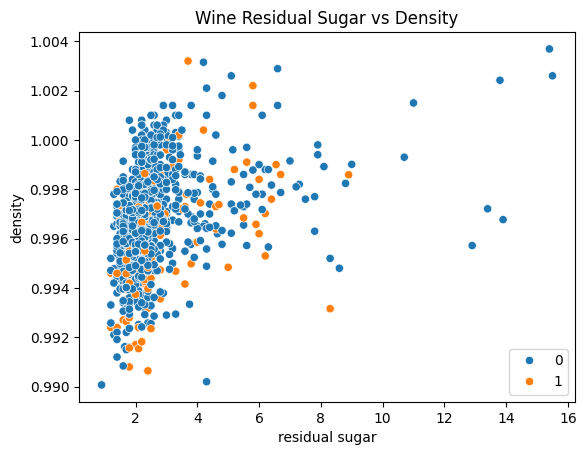

In [11]:
# Scatterplot between Wine Residual sugar and Wine density
sns.scatterplot(data=wine, x = 'residual sugar',y = 'density',hue='quality')
plt.title('Wine Residual Sugar vs Density')
plt.legend(loc = 'lower right');

* This makes perfect chemical sense: sugar is denser than water, so more sugar = higher density

<Axes: xlabel='alcohol', ylabel='density'>

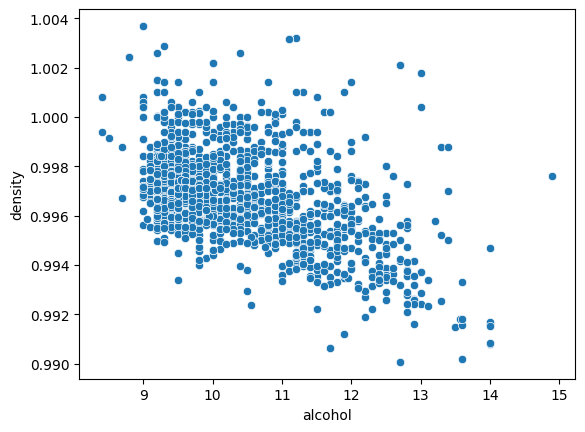

In [12]:
sns.scatterplot(data=wine, x='alcohol',y='density')

* There is a strong negative correlation between alcohol and density.

## Let's see some other correlations using a heatmap

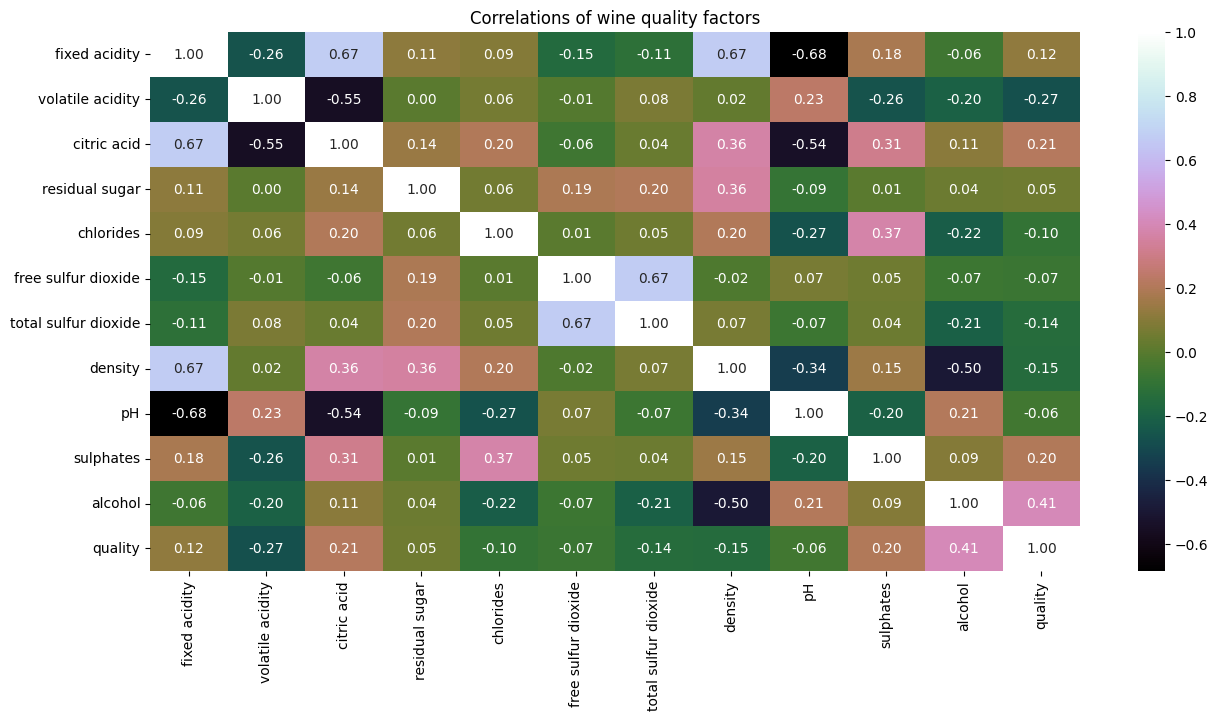

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(wine.corr(),annot=True,fmt=".2f",cmap="cubehelix")
plt.title("Correlations of wine quality factors");

* **Positive Quality Correlations**

 * Alcohol (0.41): Strongest predictor! Higher alcohol = better quality
 * Citric acid (0.21): Adds freshness and complexity
 * Sulphates (0.20): Acts as preservative, indicates proper winemaking

* **Negative Quality Correlations**

 * Volatile acidity (-0.27): Vinegar taste ruins quality
 * Density (-0.15): Lower density wines (more alcohol, less sugar) tend to be better

<Axes: title={'center': 'Correlation with quality'}>

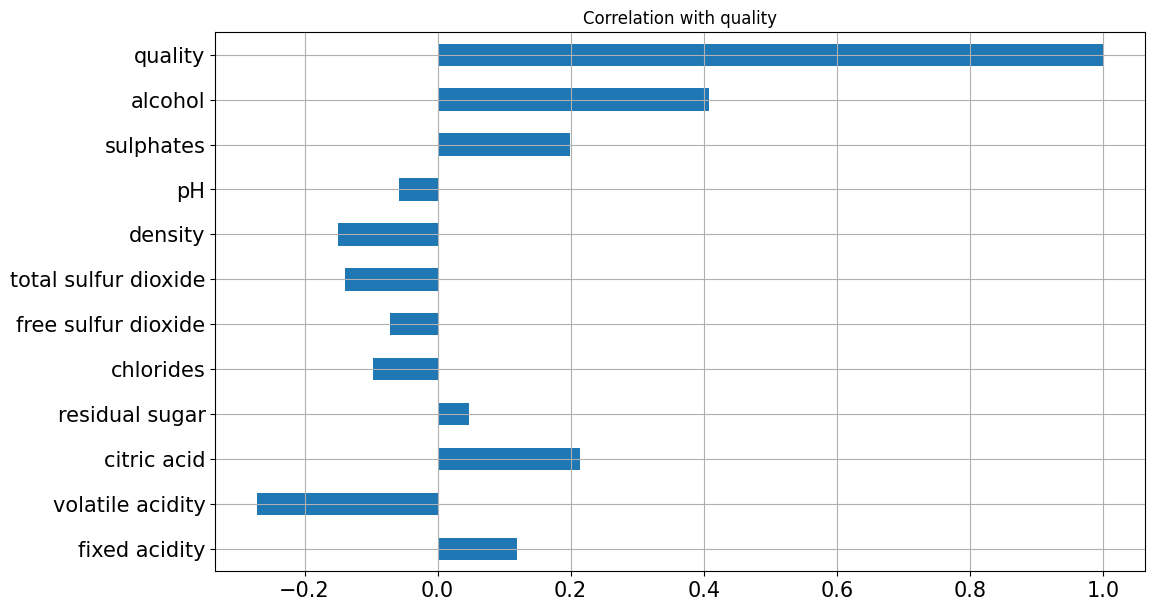

In [14]:
wine.corrwith(wine.quality).plot.barh(figsize=(12,7),title='Correlation with quality',fontsize=15,grid=True)

* Volatile acidity(~-0.27) has strong negative correlation. Vinegar taste destroys quality.
* Alcohol(~0.41) has the strongest positive correlation.

## Feature engineering

**splitting the data**

In [15]:
X = wine.loc[:,wine.columns !='quality']
y = wine.quality

In [16]:
feature_labels = wine.columns[:11]

In [19]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
rfc.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [20]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
  print(f'{i}) {feature_labels[i]} - {importances[indices[i]]:.3f}')

0) fixed acidity - 0.183
1) volatile acidity - 0.125
2) citric acid - 0.106
3) residual sugar - 0.096
4) chlorides - 0.088
5) free sulfur dioxide - 0.082
6) total sulfur dioxide - 0.071
7) density - 0.070
8) pH - 0.062
9) sulphates - 0.060
10) alcohol - 0.056


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
len(X_train),len(X_test)

(1119, 480)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns.values)
X_test = pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns.values)

## Model Building

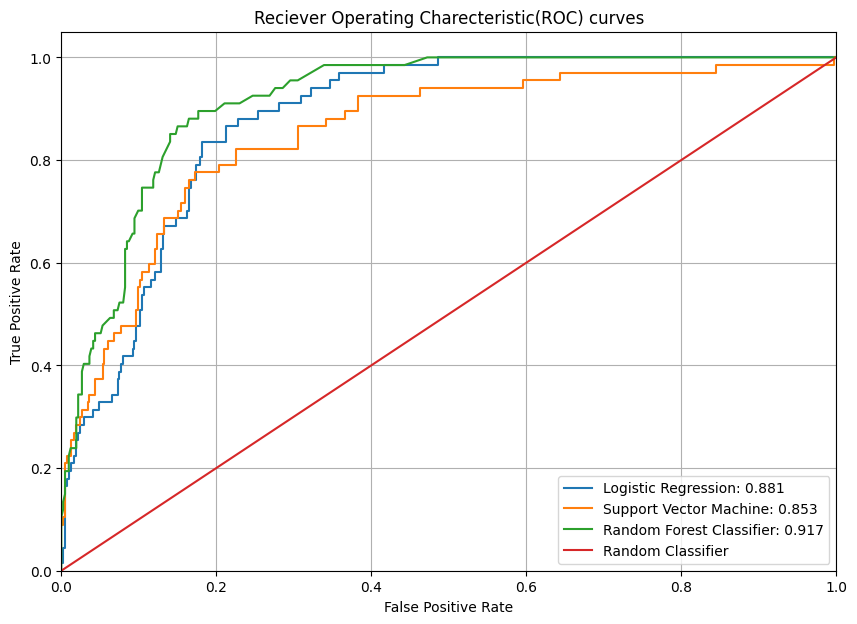

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,auc

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest Classifier':rfc
}


plt.figure(figsize=(10,7))
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred_proba = model.predict_proba(X_test)
  fpr,tpr,_ = roc_curve(y_test,y_pred_proba[:,1])
  roc_auc = auc(fpr,tpr)

  plt.plot(fpr,tpr, label = f'{name}: {roc_auc:.3f}')

plt.plot([0,1],[0,1],label='Random Classifier')
plt.title('Reciever Operating Charecteristic(ROC) curves')
plt.legend(loc='lower right')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


**Clearly from this Reciever Operating Characteristic(ROC) curve we can tell that Random Forest Classifier has the best Area under the curve(AUC). Therefore it is the best model to use.**

In [36]:
y_pred = rfc.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

mae_rf = mean_absolute_error(y_test,y_pred)
print(f'Mean absolute error is {mae_rf:.3f}')
mse_rf = mean_squared_error(y_test,y_pred)
print(f'Mean squared error is {mse_rf:.3f}')
print('-'*40)
print(classification_report(y_test,y_pred))

Mean absolute error is 0.115
Mean squared error is 0.115
----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       413
           1       0.64      0.40      0.50        67

    accuracy                           0.89       480
   macro avg       0.78      0.68      0.72       480
weighted avg       0.87      0.89      0.87       480

